In [66]:
import sys
print(sys.executable)

/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/bin/python


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [34]:
accepted = pd.read_csv('accepted.csv')

accepted.head(10)

/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3139946073.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted = pd.read_csv('accepted.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,68476668,NaN,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,67275481,NaN,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,68466926,NaN,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,68616873,NaN,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
len(accepted)

2260701

In [44]:
list(accepted.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [37]:
accepted["loan_status"].head(20)

0      Fully Paid
1      Fully Paid
2      Fully Paid
3         Current
4      Fully Paid
5      Fully Paid
6      Fully Paid
7      Fully Paid
8      Fully Paid
9      Fully Paid
10        Current
11        Current
12     Fully Paid
13    Charged Off
14     Fully Paid
15     Fully Paid
16     Fully Paid
17     Fully Paid
18        Current
19     Fully Paid
Name: loan_status, dtype: object

In [38]:
accepted.isnull().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [52]:
threshold = 0.9
accepted_cleaned = accepted.loc[:, accepted.isnull().mean() < threshold]

dropped_cols = accepted.columns[accepted.isnull().mean() >= threshold]
print("제거된 컬럼 수:", len(dropped_cols))
print(dropped_cols)

list(accepted_cleaned.columns)

제거된 컬럼 수: 38
Index(['member_id', 'desc', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percenta

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [39]:
accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [40]:
accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [41]:
accepted['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [42]:
채무불이행 = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
            "Late (16-30 days)", "Late (31-120 days)"]
accepted['repayment_status_int'] = accepted['loan_status'].apply(lambda status: 1 if status in 채무불이행 else 0).astype(int)
accepted['repayment_status'] = np.where(accepted['repayment_status_int'] == 0, '채무이행', '채무불이행')

accepted.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,repayment_status_int,repayment_status
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
6,68476668,NaN,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
7,67275481,NaN,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
8,68466926,NaN,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
9,68616873,NaN,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행


In [53]:
selected_cols = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
    'verification_status', 'purpose', 'dti', 'fico_range_low', 'fico_range_high',
    'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'loan_status'
]

accepted_selected = accepted[selected_cols]

In [54]:
accepted_selected.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,revol_bal,revol_util,total_acc
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260668e+06,2.260668e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06
mean,1.504693e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,6.985882e+02,7.025884e+02,1.161240e+01,1.665846e+04,5.033770e+01,2.416255e+01
std,9.190245e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,3.301038e+01,3.301124e+01,5.640861e+00,2.294831e+04,2.471307e+01,1.198753e+01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,6.100000e+02,6.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,6.750000e+02,6.790000e+02,8.000000e+00,5.950000e+03,3.150000e+01,1.500000e+01
50%,1.290000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,6.900000e+02,6.940000e+02,1.100000e+01,1.132400e+04,5.030000e+01,2.200000e+01
75%,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,7.150000e+02,7.190000e+02,1.400000e+01,2.024600e+04,6.940000e+01,3.100000e+01
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,8.450000e+02,8.500000e+02,1.010000e+02,2.904836e+06,8.923000e+02,1.760000e+02


/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserW

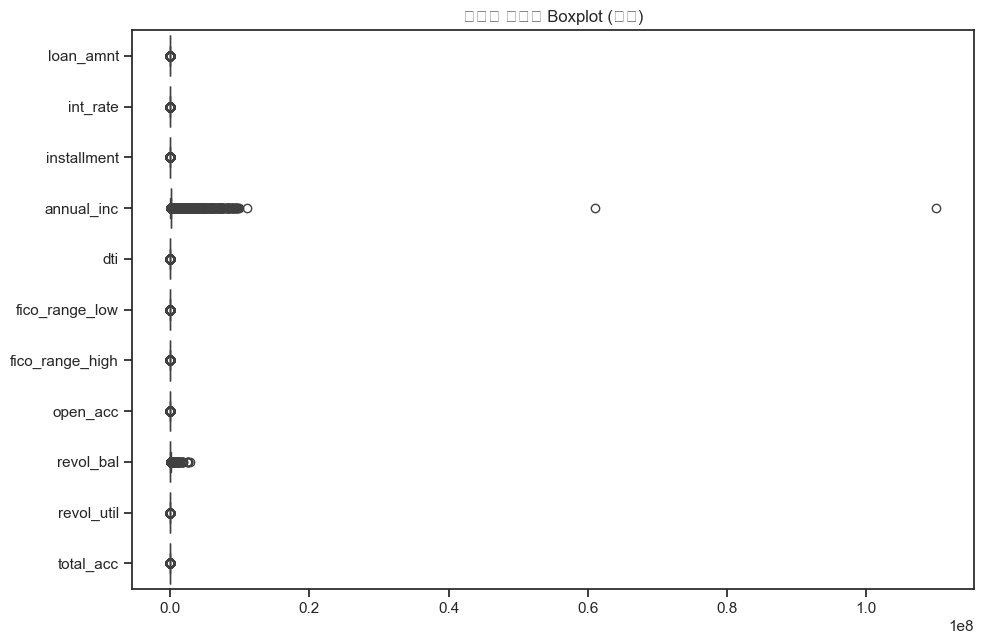

In [59]:
numeric_cols = accepted_selected.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, len(numeric_cols) * 0.6))  # 높이를 변수 수에 맞게 조정
sns.boxplot(data=accepted_selected[numeric_cols], orient='h')
plt.yticks(rotation=0)
plt.title("숫자형 변수의 Boxplot (가로)")
plt.tight_layout()
plt.show()

/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserW

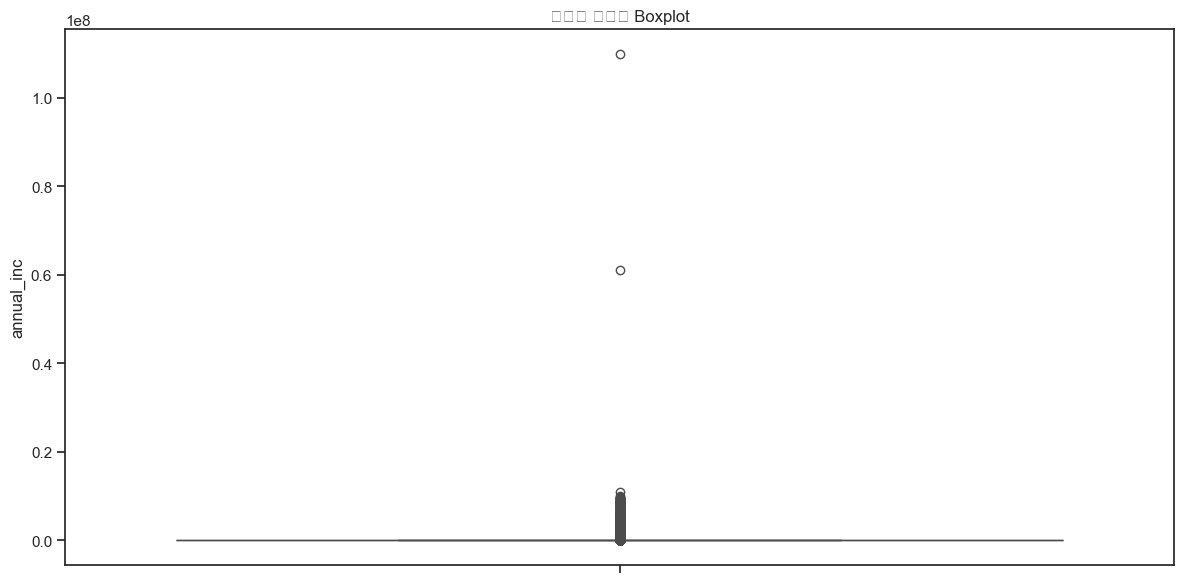

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=accepted_selected["annual_inc"])
plt.xticks(rotation=45) 
plt.title("숫자형 변수의 Boxplot")
plt.tight_layout()
plt.show()


/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12:

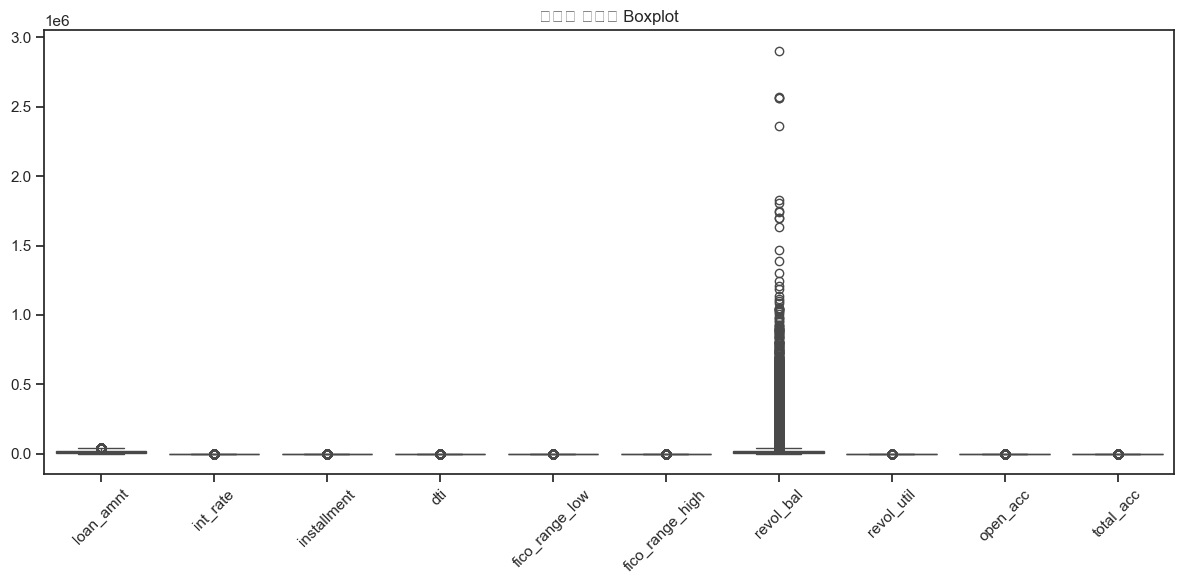

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["loan_amnt", "int_rate", "installment", "dti",
        "fico_range_low", "fico_range_high", "revol_bal", "revol_util",
        "open_acc", "total_acc"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=accepted_selected[cols])
plt.xticks(rotation=45) 
plt.title("숫자형 변수의 Boxplot")
plt.tight_layout()
plt.show()

In [72]:
accepted_selected.isnull().sum()

loan_amnt                  33
term                       33
int_rate                   33
installment                33
grade                      33
sub_grade                  33
emp_title              167002
emp_length             146940
home_ownership             33
annual_inc                 37
verification_status        33
purpose                    33
dti                      1744
fico_range_low             33
fico_range_high            33
open_acc                   62
revol_bal                  33
revol_util               1835
total_acc                  62
loan_status                33
dtype: int64

In [ ]:
import ydata-profiling


from ydata_profiling import ProfileReport

profile = ProfileReport(accepted_selected)
profile.to_file('accepted_selected.html')

In [ ]:


# 데이터 준비
X = accepted.select_dtypes(include=['number']).drop(columns=['repayment_status'])
X = X.fillna(X.mean())
y = LabelEncoder().fit_transform(accepted['repayment_status'])

# 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 중요도 출력
rf_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_df)


ModuleNotFoundError: No module named 'sklearn'

In [2]:
rejected = pd.read_csv('rejected.csv')

rejected.head(10)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
5,15000.0,2007-05-27,Trinfiniti,645.0,0%,105xx,NY,3 years,0.0
6,10000.0,2007-05-27,NOTIFYi Inc,693.0,10%,210xx,MD,< 1 year,0.0
7,3900.0,2007-05-27,For Justin.,700.0,10%,469xx,IN,2 years,0.0
8,3000.0,2007-05-28,title?,694.0,10%,808xx,CO,4 years,0.0
9,2500.0,2007-05-28,timgerst,573.0,11.76%,407xx,KY,4 years,0.0
